# Concordant and discordant profile effects on microbiome

In [1]:
library(dplyr, warn.conflicts = FALSE)
library(tidyr, warn.conflicts = FALSE)
library(readr)
library(ggplot2)
library(patchwork)
library(ggrepel)

The summary statistics were generated in a meta-analysis of 18,340 individuals (link to paper [here](https://doi.org/10.1038/s41588-020-00763-1)).

The summary statistics are stored [here](https://mibiogen.gcc.rug.nl/). The extraction was performed using the `wget` command.

Five files were downloaded:
- MiBioGen_QmbQTL_summary_phylum.zip (2.4 GB)
- MiBioGen_QmbQTL_summary_class.zip (4.4 GB)
- MiBioGen_QmbQTL_summary_order.zip (5.4 GB)
- MiBioGen_QmbQTL_summary_family.zip (9.5 GB)
- MiBioGen_QmbQTL_summary_genus.zip (35.0 GB)

The each file was unzipped using the `unzip` command, and where placed in a folder corresponding with the taxon.

The resulting files are located here:

In [1]:
list.files("~/projects/DVA/Data/gut_microbiome/")

[1] "class"                "conc_disc_phewas.tsv" "family"              
[4] "genus"                "micro_hits.tsv"       "order"               
[7] "overlap.tsv"          "phylum"               "snp_list.txt"

Inside a taxon folder there is one file for each microbial group, e.g.:

In [3]:
list.files("~/dva/files/gut_microbiome/phylum/")

[1] "phylum.Actinobacteria.id.400.summary.txt.gz"  
[2] "phylum.Bacteroidetes.id.905.summary.txt.gz"   
[3] "phylum.Cyanobacteria.id.1500.summary.txt.gz"  
[4] "phylum.Euryarchaeota.id.55.summary.txt.gz"    
[5] "phylum.Firmicutes.id.1672.summary.txt.gz"     
[6] "phylum.Lentisphaerae.id.2238.summary.txt.gz"  
[7] "phylum.Proteobacteria.id.2375.summary.txt.gz" 
[8] "phylum.Tenericutes.id.3919.summary.txt.gz"    
[9] "phylum.Verrucomicrobia.id.3982.summary.txt.gz"

Within each file, variants are sorted by their association strength, e.g.:

In [4]:
pipe("zcat ~/projects/DVA/Data/gut_microbiome/phylum/phylum.Actinobacteria.id.400.summary.txt.gz | head") %>%
    read_tsv(show_col_types = FALSE)

bac,chr,bp,rsID,ref.allele,eff.allele,beta,SE,Z.weightedSumZ,P.weightedSumZ,N,Ncohorts
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
phylum.Actinobacteria.id.400,2,135837906,rs7570971,C,A,0.08665304,0.01136229,7.695133,1.413468e-14,17782,23
phylum.Actinobacteria.id.400,2,136616754,rs182549,T,C,0.08463746,0.01148642,7.425073,1.127174e-13,17990,24
phylum.Actinobacteria.id.400,2,136707982,rs6754311,T,C,0.08450587,0.01146810,7.412178,1.242419e-13,17988,24
phylum.Actinobacteria.id.400,2,136608646,rs4988235,A,G,0.08452397,0.01147294,7.425657,1.122214e-13,17990,24
phylum.Actinobacteria.id.400,2,135954797,rs1375131,T,C,0.08154456,0.01134160,7.250320,4.157890e-13,17988,24
phylum.Actinobacteria.id.400,2,135907088,rs6730157,A,G,0.08124659,0.01133998,7.238379,4.540795e-13,17990,24
phylum.Actinobacteria.id.400,2,136413650,rs36084664,A,G,-0.08428541,0.01230361,-7.259803,3.876540e-13,16862,21
phylum.Actinobacteria.id.400,2,136381348,rs12465802,G,A,0.08004605,0.01141968,7.087337,1.367167e-12,17990,24
phylum.Actinobacteria.id.400,2,136740900,rs687670,T,C,0.08286681,0.01170313,6.976787,3.020072e-12,17990,24


In [10]:
pipe("zcat ~/projects/DVA/Data/gut_microbiome/phylum/phylum.Actinobacteria.id.400.summary.txt.gz | tail") %>%
    read_tsv(show_col_types = FALSE)

phylum.Actinobacteria.id.400,2,239987799,rs62189532,T,C,-0.00109991247290634,0.014720831643361,-0.0161452634011267,0.987118503240195,16976,22
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
phylum.Actinobacteria.id.400,2,174202663,rs62175699,C,A,0.0017180950,0.02215739,0.121957644,0.9029326,16070,19
phylum.Actinobacteria.id.400,10,39048406,rs146286353,C,T,-0.0023421032,0.03003146,-0.024602656,0.9803719,10339,11
phylum.Actinobacteria.id.400,2,135040763,rs11689718,A,G,0.0016901555,0.01799825,-0.010792173,0.9913893,17990,24
phylum.Actinobacteria.id.400,12,119252122,rs2730730,G,T,0.0042502276,0.02271713,0.166167726,0.8680250,16503,18
phylum.Actinobacteria.id.400,5,110783850,rs62371288,A,G,0.0017889949,0.01451034,0.044226786,0.9647236,17989,24
phylum.Actinobacteria.id.400,15,66537997,rs7178788,G,A,0.0001506860,0.01157870,0.001975980,0.9984234,17990,24
phylum.Actinobacteria.id.400,5,36766559,rs12519272,C,T,0.0020263923,0.01366233,-0.003892033,0.9968946,17990,24
phylum.Actinobacteria.id.400,15,70346292,rs6494841,A,G,0.0010240722,0.01135556,0.064287490,0.9487413,17782,23
phylum.Actinobacteria.id.400,2,209605030,rs75330459,G,C,-0.0007898251,0.01719086,0.027126827,0.9783586,17184,23


There are around ~6 million variants in each file:

In [11]:
system("zcat ~/projects/DVA/Data/gut_microbiome/phylum/phylum.Actinobacteria.id.400.summary.txt.gz | wc -l", intern = TRUE)

[1] "5724808"

To extract concordant and discordant effects we will then `grep` the list of SNPs on every file:

In [ ]:
system("awk '{print $3}' ~/projects/DVA/Discordant/Clinical/data/mix.tsv | tail -n+2 > ~/projects/DVA/Data/gut_microbiome/snp_list.txt")

In [2]:
system("head ~/projects/DVA/Data/gut_microbiome/snp_list.txt", intern = TRUE)

[1] "rs543874"   "rs1538748"  "rs2282231"  "rs7559658"  "rs10803762"
 [6] "rs12692738" "rs1260326"  "rs1613599"  "rs6545714"  "rs13021737"

Since the files are compressed, we'll use `zgrep`:

In [44]:
paste0(
    "for folder in $(ls -d ~/projects/DVA/Data/gut_microbiome/*/)", "\n",
    "do", "\n",
    "for file in $(ls -d $folder*)", "\n",
    "do", "\n",
    "zgrep -F -w -f ~/projects/DVA/Data/gut_microbiome/snp_list.txt $file", "\n",
    "done", "\n",
    "done  > ~/projects/DVA/Data/gut_microbiome/conc_disc_phewas.tsv"
) %>%
    system()

The final file:

In [2]:
micro_phewas <- read_tsv("~/projects/DVA/Data/gut_microbiome/conc_disc_phewas.tsv", 
                         col_names = c("taxon", "rsid", "nea_micro", "ea_micro", 
                                       "beta_micro", "se_micro", "p_micro"),
                         col_types = "c--cccnn-n--")
head(micro_phewas)
nrow(micro_phewas)

taxon,rsid,nea_micro,ea_micro,beta_micro,se_micro,p_micro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
class.Actinobacteria.id.419,rs7903146,C,T,-0.03382967,0.01248018,0.006540761
class.Actinobacteria.id.419,rs8047395,A,G,0.02278689,0.01109394,0.040711686
class.Actinobacteria.id.419,rs17681708,T,C,-0.02335532,0.01250057,0.061610105
class.Actinobacteria.id.419,rs1518815,T,C,0.02401389,0.01199227,0.044028139
class.Actinobacteria.id.419,rs10938397,A,G,-0.01954580,0.01134101,0.086664248
class.Actinobacteria.id.419,rs1557765,C,T,0.02060151,0.01143291,0.074859254


[1] 14103

Joining with concordant and discordant SNPs and harmonizing to the BMI increasing allele:

In [3]:
mix <- read_tsv("~/projects/DVA/Discordant/Clinical/data/mix.tsv", show_col_types = FALSE)
head(mix)

chr,hg19_pos,rsid,ea,nea,eaf.bmi,beta.bmi,se.bmi,p.bmi,n.bmi,eaf.t2d,beta.t2d,se.t2d,p.t2d,n.t2d,disc,nearest_gene
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,177889480,rs543874,G,A,0.1952,0.0475,0.0020,1.2e-122,795504,0.20,0.051,0.0080,1.5e-10,231420,0,SEC16B
1,219623621,rs1538748,C,T,0.3714,0.0094,0.0017,2.3e-08,794936,0.38,-0.041,0.0065,2.5e-10,231420,1,LYPLAL1-AS1
1,39569571,rs2282231,T,C,0.2249,0.0165,0.0021,4.8e-15,689443,0.22,0.068,0.0076,7.8e-19,231420,0,MACF1
2,147920213,rs7559658,C,T,0.1893,0.0143,0.0022,6.1e-11,691512,0.19,0.044,0.0081,3.5e-08,231420,0,ACVR2A
2,161105876,rs10803762,A,G,0.6781,0.0116,0.0018,3.5e-10,686227,0.68,0.044,0.0068,1.6e-10,231420,0,ITGB6
2,165558252,rs12692738,C,T,0.2419,0.0136,0.0020,3.3e-12,784166,0.24,-0.050,0.0075,2.4e-11,231420,1,COBLL1


In [4]:
micro_h <- inner_join(mix, micro_phewas, by = "rsid") %>%
    mutate(harmon = case_when(ea_micro == ea & nea_micro == nea ~ 1,
                              ea_micro == nea & nea_micro == ea ~ -1,
                              TRUE ~ 0),
           beta_micro = beta_micro * harmon) %>%
    filter(harmon != 0) %>%
    select(-c(ea_micro, nea_micro))
head(micro_h)
nrow(micro_h)

chr,hg19_pos,rsid,ea,nea,eaf.bmi,beta.bmi,se.bmi,p.bmi,n.bmi,⋯,se.t2d,p.t2d,n.t2d,disc,nearest_gene,taxon,beta_micro,se_micro,p_micro,harmon
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,177889480,rs543874,G,A,0.1952,0.0475,0.002,1.2e-122,795504,⋯,0.008,1.5e-10,231420,0,SEC16B,class.Actinobacteria.id.419,-1.793801e-03,0.01387429,0.8663149,1
1,177889480,rs543874,G,A,0.1952,0.0475,0.002,1.2e-122,795504,⋯,0.008,1.5e-10,231420,0,SEC16B,class.Alphaproteobacteria.id.2379,1.587442e-02,0.01836115,0.4040443,1
1,177889480,rs543874,G,A,0.1952,0.0475,0.002,1.2e-122,795504,⋯,0.008,1.5e-10,231420,0,SEC16B,class.Bacilli.id.1673,1.647511e-02,0.01352082,0.1981049,1
1,177889480,rs543874,G,A,0.1952,0.0475,0.002,1.2e-122,795504,⋯,0.008,1.5e-10,231420,0,SEC16B,class.Bacteroidia.id.912,-1.445372e-03,0.01315787,0.9029255,1
1,177889480,rs543874,G,A,0.1952,0.0475,0.002,1.2e-122,795504,⋯,0.008,1.5e-10,231420,0,SEC16B,class.Betaproteobacteria.id.2867,5.783323e-05,0.01361064,0.9535746,1
1,177889480,rs543874,G,A,0.1952,0.0475,0.002,1.2e-122,795504,⋯,0.008,1.5e-10,231420,0,SEC16B,class.Clostridia.id.1859,-1.441519e-02,0.01315437,0.2726829,1


[1] 14103

No hits at genome-wide significant level:

In [9]:
micro_h %>%
    filter(p_micro < 5e-8) %>%
    nrow

[1] 0

Summary-based GRS:

In [6]:
meta_micro <- micro_h %>%
    group_by(taxon, disc) %>%
    group_modify(~tryCatch({
        res <- meta::metagen(TE = beta_micro, seTE = se_micro, data = .x,
                             fixed = F, random = T,
                             method.tau = "PM",
                             prediction = F)
        return(with(res,
                    data.frame(b_meta = TE.random, se_meta = seTE.random,
                               conf_low_meta = lower.random, conf_high_meta = upper.random,
                               p_meta = pval.random, Qv = Q, Qdf = df.Q, Qp = pval.Q,
                               Tau = tau)))
    }, error = function(e) { return(data.frame(NULL)) })) %>%
    group_by(taxon) %>%
    filter(dplyr::n() == 2) %>%
    mutate(b_comp = abs(b_meta[1] - b_meta[2]),
           b_comp_se = sqrt(se_meta[1]^2 + se_meta[2]^2),
           p_comp = 2 * pnorm(-abs(b_comp/b_comp_se))) %>%
    ungroup()
head(meta_micro)

taxon,disc,b_meta,se_meta,conf_low_meta,conf_high_meta,p_meta,Qv,Qdf,Qp,Tau,b_comp,b_comp_se,p_comp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
class.Actinobacteria.id.419,0,0.0019249491,0.001764358,-0.0015331287,0.005383027,0.27526422,53.12343,47,0.25009740,0.00000000,0.0005765462,0.004176085,0.8901938
class.Actinobacteria.id.419,1,0.0025014953,0.003785066,-0.0049170975,0.009920088,0.50868572,26.53103,18,0.08822151,0.01067996,0.0005765462,0.004176085,0.8901938
class.Alphaproteobacteria.id.2379,0,0.0004971144,0.002295248,-0.0040014894,0.004995718,0.82853244,45.58002,47,0.53146673,0.00000000,0.0047896080,0.004354249,0.2713387
class.Alphaproteobacteria.id.2379,1,0.0052867224,0.003700179,-0.0019654947,0.012538939,0.15306895,17.17414,18,0.51116455,0.00000000,0.0047896080,0.004354249,0.2713387
class.Bacilli.id.1673,0,0.0040030224,0.001710499,0.0006505067,0.007355538,0.01926999,52.65481,47,0.26449700,0.00000000,0.0036936567,0.003241026,0.2544294
class.Bacilli.id.1673,1,0.0003093657,0.002752898,-0.0050862147,0.005704946,0.91052353,15.70540,18,0.61309913,0.00000000,0.0036936567,0.003241026,0.2544294


In [7]:
write_tsv(meta_micro, "../data/meta_micro.tsv")

In [5]:
meta_micro <- read_tsv("../data/meta_micro.tsv", show_col_types = FALSE)

Any survive FDR correction?

In [8]:
sigmeta <- meta_micro %>%
    mutate(across(c(p_meta, p_comp), ~ p.adjust(.x, "fdr"),
                  .names = "{.col}_adj")) %>%
    filter(p_comp_adj < 0.05) %>%
    group_by(taxon) %>%
    filter(any(p_meta_adj < 0.05)) %>%
    ungroup
sigmeta

taxon,disc,b_meta,se_meta,conf_low_meta,conf_high_meta,p_meta,Qv,Qdf,Qp,Tau,b_comp,b_comp_se,p_comp,p_meta_adj,p_comp_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


Nominally significant in any profile estimate and nominal significance in the difference

In [6]:
suggestive_micro <- meta_micro %>%
    filter(p_comp < 0.05) %>%
    group_by(taxon) %>%
    filter(any(p_meta < 0.05)) %>%
    ungroup
suggestive_micro

taxon,disc,b_meta,se_meta,conf_low_meta,conf_high_meta,p_meta,Qv,Qdf,Qp,Tau,b_comp,b_comp_se,p_comp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
family.Bacteroidaceae.id.917,0,0.004665332,0.001666870,0.0013983272,0.0079323373,0.005128369,46.26299,47,0.5029910,0,0.008896924,0.003158279,0.004847208
family.Bacteroidaceae.id.917,1,-0.004231592,0.002682587,-0.0094893660,0.0010261820,0.114696729,15.96817,18,0.5947688,0,0.008896924,0.003158279,0.004847208
family.Lactobacillaceae.id.1836,0,0.005581359,0.002688545,0.0003119069,0.0108508102,0.037896054,43.18877,47,0.6311691,0,0.011136613,0.005090298,0.028683325
family.Lactobacillaceae.id.1836,1,-0.005555254,0.004322367,-0.0140269382,0.0029164295,0.198710427,16.79873,18,0.5369819,0,0.011136613,0.005090298,0.028683325
genus.Bacteroides.id.918,0,0.004665332,0.001666870,0.0013983272,0.0079323373,0.005128369,46.26299,47,0.5029910,0,0.008896924,0.003158279,0.004847208
genus.Bacteroides.id.918,1,-0.004231592,0.002682587,-0.0094893660,0.0010261820,0.114696729,15.96817,18,0.5947688,0,0.008896924,0.003158279,0.004847208
genus.Butyricimonas.id.945,0,0.002143299,0.002173085,-0.0021158690,0.0064024664,0.323989237,36.87878,47,0.8553849,0,0.009851175,0.004117894,0.016743859
genus.Butyricimonas.id.945,1,-0.007707876,0.003497822,-0.0145634809,-0.0008522713,0.027550959,17.43798,18,0.4932115,0,0.009851175,0.004117894,0.016743859
genus.Coprococcus2.id.11302,0,-0.002026288,0.002103607,-0.0061492818,0.0020967052,0.335424677,49.22184,47,0.3842965,0,0.010628885,0.003985030,0.007648544


In [19]:
suggestive_micro %>%
    arrange(p_comp) %>%
    transmute(taxon, disc = ifelse(disc == 1, "Disc", "Conc"), 
              across(c(beta = b_meta, lower = conf_low_meta, upper = conf_high_meta), ~format(round(.x, digits = 4), decimal.mark = ",")),
              across(c(p = p_meta, p_comp), ~format(signif(.x, 3), decimal.mark = ","))) %>%
    pivot_wider(names_from = disc, values_from = c(beta, lower, upper, p)) %>%
    select(taxon, contains("Conc"), contains("Disc"), p_comp) %>%
    separate(taxon, into = c("Taxon level", "Taxon name", NA, "Taxon ID")) %>%
    mutate(`Taxon level` = stringr::str_to_sentence(`Taxon level`)) %>%
    arrange(`Taxon level`, `Taxon name`)

Taxon level,Taxon name,Taxon ID,beta_Conc,lower_Conc,upper_Conc,p_Conc,beta_Disc,lower_Disc,upper_Disc,p_Disc,p_comp
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Family,Bacteroidaceae,917,"0,0047","0,0014","0,0079","0,00513","-0,0042","-0,0095","0,0010","0,11500","0,00485"
Family,Lactobacillaceae,1836,"0,0056","0,0003","0,0109","0,03790","-0,0056","-0,0140","0,0029","0,19900","0,02870"
Genus,Bacteroides,918,"0,0047","0,0014","0,0079","0,00513","-0,0042","-0,0095","0,0010","0,11500","0,00485"
Genus,Butyricimonas,945,"0,0021","-0,0021","0,0064","0,32400","-0,0077","-0,0146","-0,0009","0,02760","0,01670"
Genus,Coprococcus2,11302,"-0,0020","-0,0061","0,0021","0,33500","0,0086","0,0020","0,0152","0,01100","0,00765"
Genus,Lachnoclostridium,11308,"0,0016","-0,0017","0,0049","0,34800","-0,0058","-0,0111","-0,0005","0,03140","0,02010"
Genus,Parabacteroides,954,"0,0038","0,0004","0,0071","0,02850","-0,0050","-0,0104","0,0004","0,06890","0,00691"
Genus,Ruminiclostridium6,11356,"-0,0026","-0,0064","0,0012","0,18100","0,0062","0,0001","0,0124","0,04620","0,01650"
Genus,Subdoligranulum,2070,"-0,0027","-0,0061","0,0006","0,10700","0,0060","0,0007","0,0114","0,02700","0,00638"


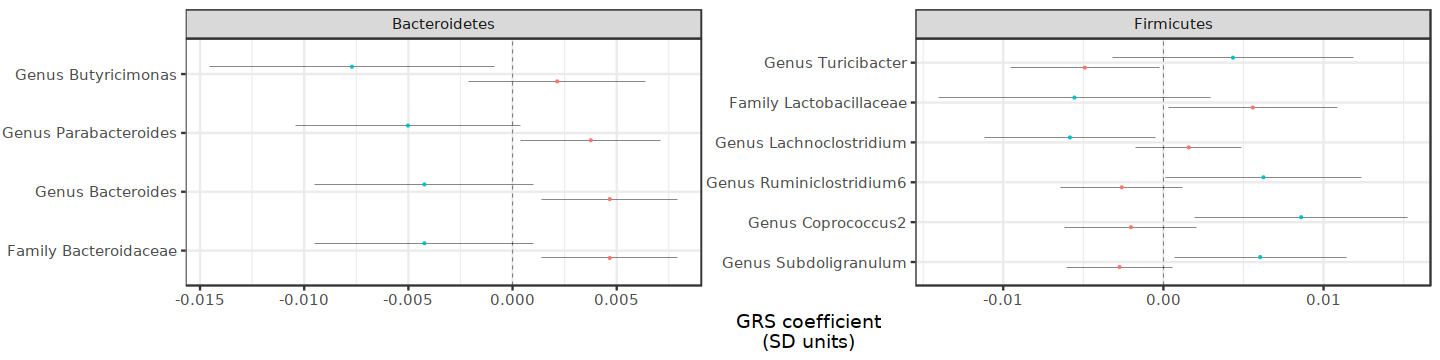

In [11]:
options(repr.plot.height = 3, repr.plot.width = 12)
sugg_micro_plot <- suggestive_micro %>%
    mutate(taxon = stringr::str_to_title(stringr::str_replace_all(taxon, c("\\.id\\.[0-9]+$" = "", "\\." = " "))),
           phylum = ifelse(taxon %in% c("Family Bacteroidaceae",
                                        "Genus Bacteroides",
                                        "Genus Parabacteroides",
                                        "Genus Butyricimonas"),
                           "Bacteroidetes", "Firmicutes")) %>%
    ggplot(aes(b_meta, reorder(taxon, p_comp))) +
    geom_vline(xintercept = 0, linetype = "dashed", size = .1) +
    geom_linerange(aes(xmin = conf_low_meta, xmax = conf_high_meta,
                       group = factor(disc)),
                   position = position_dodge(width = .5), size = .1) +
    geom_point(aes(group = factor(disc), color = factor(disc)),
               position = position_dodge(width = .5), size = .1) +
    facet_wrap(~phylum, nrow = 1, scales = "free") +
    theme_bw() +
    theme(legend.position = "none") +
    labs(x = "GRS coefficient\n(SD units)", y = NULL, color = "Profile")
save(sugg_micro_plot, file = "../plots/sugg_micro_plot.RData")
sugg_micro_plot

## Causal inference analysis

Extracting genome-wide significant associations:

In [75]:
paste0(
    "for folder in $(ls -d ~/projects/DVA/Data/gut_microbiome/*/)", "\n",
    "do", "\n",
    "for file in $(ls -d $folder*)", "\n",
    "do", "\n",
    "zcat $file | awk '($10 < 5e-8){print $0}'", "\n",
    "done", "\n",
    "done  > ~/dva/files/gut_microbiome/micro_hits.tsv"
) %>%
    system()

Overlap with T2D and BMI:

In [67]:
overlap_tab <- paste(
    "awk",
        "'NR==FNR{a[$4]=$0;next}",
        "($3 in a){print a[$3]\"\t\"$0}'",
        "~/projects/DVA/Data/gut_microbiome/micro_hits.tsv", 
        "~/projects/DVA/Data/GWAS_sumstats/bmi.txt", "|",
    "sed 's/ //g'", "|",
    "awk",
        "'NR==FNR{a[$2\":\"$3]=$0;next}",
        "($1 in a){print a[$1]\"\t\"$0}'",
        "-",
        "~/projects/DVA/Data/GWAS_sumstats/t2d_diagram.txt"
) %>%
    pipe %>%
    read_tsv(col_names = c("taxon", "chr", "pos", "rsid", 
                           paste(c("nea", "ea", "beta", "se", "pval"), "micro", sep = "_"),
                           paste(c("ea", "nea", "eaf", "beta", "se", "pval"), "bmi", sep = "_"),
                           paste(c("ea", "nea", "beta", "se", "pval"), "t2d", sep = "_")),
             col_types = paste(c("cnncccnn-n--", "---ccnnnn-", "-ccnnn-"), collapse = ""))
head(overlap_tab)
nrow(overlap_tab)

taxon,chr,pos,rsid,nea_micro,ea_micro,beta_micro,se_micro,pval_micro,ea_bmi,nea_bmi,eaf_bmi,beta_bmi,se_bmi,pval_bmi,ea_t2d,nea_t2d,beta_t2d,se_t2d,pval_t2d
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
order.Bifidobacteriales.id.432,2,136720344,rs3768998,G,T,0.10866677,0.01811931,1.710755e-09,T,G,0.10010,-0.0075,0.0030,0.013,T,G,0.0091,0.021,0.67
order.Bifidobacteriales.id.432,2,136590558,rs3754690,C,T,0.10969241,0.01881639,8.000723e-09,T,C,0.09401,-0.0072,0.0032,0.022,T,C,-0.0097,0.023,0.67
order.Bifidobacteriales.id.432,2,136655620,rs6430593,G,A,0.10345821,0.01756477,6.673618e-09,A,G,0.11190,-0.0069,0.0030,0.022,A,G,0.0180,0.021,0.37
genus.Enterorhabdus.id.820,4,127337078,rs4833344,C,T,0.09232171,0.01628083,1.483898e-08,T,C,0.48740,0.0008,0.0018,0.660,T,C,-0.0061,0.012,0.62
order.Bifidobacteriales.id.432,2,135787148,rs16831264,G,C,0.09859052,0.01654040,9.615805e-10,C,G,0.12590,-0.0042,0.0028,0.130,C,G,0.0110,0.020,0.58
genus.Streptococcus.id.1853,12,100305117,rs10860537,C,T,-0.11336355,0.02030118,3.571094e-08,T,C,0.08127,-0.0045,0.0032,0.150,T,C,-0.0250,0.022,0.25


[1] 96

In [41]:
print(data.frame(head(overlap_tab)))

                           taxon chr       pos       rsid nea_micro ea_micro
1 order.Bifidobacteriales.id.432   2 136720344  rs3768998         G        T
2 order.Bifidobacteriales.id.432   2 136590558  rs3754690         C        T
3 order.Bifidobacteriales.id.432   2 136655620  rs6430593         G        A
4     genus.Enterorhabdus.id.820   4 127337078  rs4833344         C        T
5 order.Bifidobacteriales.id.432   2 135787148 rs16831264         G        C
6    genus.Streptococcus.id.1853  12 100305117 rs10860537         C        T
   beta_micro   se_micro   pval_micro ea_bmi nea_bmi eaf_bmi beta_bmi se_bmi
1  0.10866677 0.01811931 1.710755e-09      T       G 0.10010  -0.0075 0.0030
2  0.10969241 0.01881639 8.000723e-09      T       C 0.09401  -0.0072 0.0032
3  0.10345821 0.01756477 6.673618e-09      A       G 0.11190  -0.0069 0.0030
4  0.09232171 0.01628083 1.483898e-08      T       C 0.48740   0.0008 0.0018
5  0.09859052 0.01654040 9.615805e-10      C       G 0.12590  -0.0042 0.0028

Any valid instruments?

In [66]:
valid_ins <- overlap_tab %>%
    filter(pval_bmi < 5e-5)
print(data.frame(valid_ins))

                           taxon chr       pos      rsid nea_micro ea_micro
1 order.Bifidobacteriales.id.432   2 135705558 rs1979033         G        A
2 order.Bifidobacteriales.id.432   2 135755629 rs1530559         A        G
  beta_micro   se_micro   pval_micro ea_bmi nea_bmi eaf_bmi beta_bmi se_bmi
1 0.07512608 0.01196498 1.052949e-10      A       G  0.4873  -0.0076 0.0018
2 0.07382949 0.01197211 5.232224e-10      A       G  0.5523   0.0097 0.0017
  pval_bmi ea_t2d nea_t2d beta_t2d se_t2d pval_t2d
1  1.7e-05      A       G   0.0180  0.013     0.17
2  1.6e-08      A       G  -0.0043  0.014     0.76


The BMI increasing allele of this variant is associated with:
- Lower Bifidobacterium in the gut.
- Higher T2D risk.

Quantifying the microbial effect on T2D risk:

- SMR & HEIDI functions:

In [13]:
source("./MR_FX.R")

- SMR estimate (T2D LogOR for each SD unit increase in microbial abundance):

In [55]:
smr_estimates <- valid_ins %>%
    mutate(
        ea = ifelse(beta_bmi > 0, ea_bmi, nea_bmi),
        nea = ifelse(beta_bmi > 0, nea_bmi, ea_bmi),
        harmon_micro = case_when(ea == ea_micro & nea == nea_micro ~ 1,
                                 ea == nea_micro & nea == ea_micro ~ -1,
                               TRUE ~ 0),
        harmon_t2d = case_when(ea == ea_t2d & nea == nea_t2d ~ 1,
                               ea == nea_t2d & nea == ea_t2d ~ -1,
                               TRUE ~ 0),
        beta_bmi = abs(beta_bmi),
        beta_micro = beta_micro * harmon_micro,
        beta_t2d = beta_t2d * harmon_t2d,
        beta_smr = beta_t2d / beta_micro,
        se_smr = std_err_smr(beta_micro, se_micro, beta_t2d, se_t2d),
        p_smr = pval_smr(beta_micro, se_micro, beta_t2d, se_t2d)
    ) %>%
    select(-c(harmon_t2d, harmon_micro, ea_bmi, nea_bmi, ea_micro, nea_micro, ea_t2d, nea_t2d))
print(data.frame(smr_estimates))

                           taxon chr       pos      rsid  beta_micro   se_micro
1 order.Bifidobacteriales.id.432   2 135755629 rs1530559 -0.07382949 0.01197211
    pval_micro eaf_bmi beta_bmi se_bmi pval_bmi beta_t2d se_t2d pval_t2d ea nea
1 5.232224e-10  0.5523   0.0097 0.0017  1.6e-08  -0.0043  0.014     0.76  A   G
    beta_smr    se_smr     p_smr
1 0.05824231 0.1898612 0.7590241


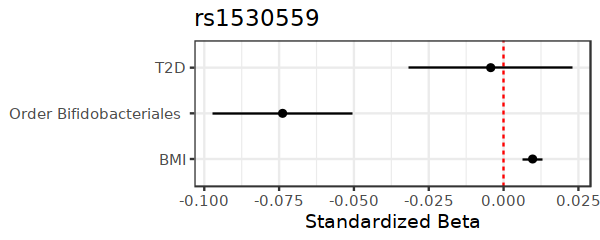

In [65]:
options(repr.plot.height = 2, repr.plot.width = 5)
smr_estimates %>%
    select(taxon, rsid, ea, starts_with("beta"), starts_with("se"), -ends_with("smr")) %>%
    pivot_longer(-c(taxon, rsid, ea), names_to = c(".value", "type"), names_sep = "_") %>%
    mutate(ci = qnorm(1 - (.05/2)) * se,
           type = toupper(type),
           type = ifelse(type == "MICRO", 
                         stringr::str_to_title(gsub("\\.", " ", taxon)), 
                         type),
           type = gsub(" Id [0-9]+", " ", type)) %>%
    ggplot(aes(beta, type)) +
    geom_vline(xintercept = 0, linetype = "dashed", color = "red") +
    geom_linerange(aes(xmin = beta - ci, xmax = beta + ci)) +
    geom_point() +
    theme_bw() +
    labs(x = "Standardized Beta", y = NULL, title = unique(smr_estimates$rsid))

Centering on the functional variant rs4988235 (2:136608646 in hg19):

In [2]:
136608646 - 2e6

[1] 134608646

In [3]:
136608646 + 2e6

[1] 138608646

In [4]:
lct_bifido <- paste(
    "zcat ~/projects/DVA/Data/gut_microbiome/order/order.Bifidobacteriales.id.432.summary.txt.gz",
    "awk '$2 == 2 && $3 > 134608646 && $3 < 138608646'",
    sep = " | "
) %>%
    pipe %>%
    read_tsv(col_names = c("chrom", "pos",
                           paste(c("nea", "ea", "beta", "se", "pval"), "micro", sep = "_")),
             col_types = "-nn-ccnn-n--")
head(lct_bifido)
nrow(lct_bifido)

chrom,pos,nea_micro,ea_micro,beta_micro,se_micro,pval_micro
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2,136616754,T,C,0.1170699,0.01267034,5.942001e-20
2,136608646,A,G,0.1160245,0.01265521,1.299760e-19
2,136707982,T,C,0.1130838,0.01264986,8.769289e-19
2,135837906,C,A,0.1125078,0.01251782,2.531702e-19
2,136407479,A,G,0.1118592,0.01275139,4.818992e-18
2,136413650,A,G,-0.1133515,0.01350587,1.446065e-18


[1] 7233

In [5]:
lct_bmi <- paste(
    "awk '$1 == 2 && $2 > 134608646 && $2 < 138608646'",
    "~/projects/DVA/Data/GWAS_sumstats/bmi.txt"
) %>%
    pipe %>%
    read_tsv(col_names = c("chrom", "pos",
                           paste(c("ea", "nea", "beta", "se", "pval"), "bmi", sep = "_")),
             "nn-cc-nnn-")
                           
head(lct_bmi)
nrow(lct_bmi)

chrom,pos,ea_bmi,nea_bmi,beta_bmi,se_bmi,pval_bmi
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2,135221324,A,T,0.0030,0.0046,0.51
2,137644283,T,C,-0.0023,0.0030,0.45
2,137644314,A,G,-0.0013,0.0037,0.73
2,137974224,A,G,-0.0019,0.0021,0.36
2,137641015,T,C,-0.0006,0.0030,0.85
2,134716471,T,C,-0.0006,0.0021,0.76


[1] 3138

In [6]:
lct_t2d <- paste(
    "grep '^2:'",
    "~/projects/DVA/Data/GWAS_sumstats/t2d_diagram.txt", "|",
    "sed 's/:/\t/g'", "|",
    "awk '$2 > 134608646 && $2 < 138608646'"
) %>%
    pipe %>%
    read_tsv(col_names = c("chrom", "pos",
                           paste(c("ea", "nea", "beta", "se", "pval"), "t2d", sep = "_")),
             col_types = "nnccnnn-")
head(lct_t2d)
nrow(lct_t2d)

chrom,pos,ea_t2d,nea_t2d,beta_t2d,se_t2d,pval_t2d
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2,138607187,A,G,-0.0890,0.046,0.052
2,136120181,A,C,-0.0770,0.200,0.700
2,137628555,A,G,0.1400,0.120,0.240
2,136678320,A,G,-0.0088,0.170,0.960
2,137601077,A,G,-0.0096,0.018,0.590
2,138148959,A,T,0.0016,0.014,0.910


[1] 15336

In [7]:
lct_join <- list(lct_bifido, lct_bmi, lct_t2d) %>%
    purrr::reduce(inner_join) %>%
    mutate(ea = ifelse(beta_bmi > 0, ea_bmi, nea_bmi),
           nea = ifelse(beta_bmi > 0, nea_bmi, ea_bmi),
           beta_bmi = abs(beta_bmi),
           harmon_micro = case_when(ea == ea_micro & nea == nea_micro ~ 1,
                                    ea == nea_micro & nea == ea_micro ~ -1,
                                    TRUE ~ 0),
           harmon_t2d = case_when(ea == ea_t2d & nea == nea_t2d ~ 1,
                                  ea == nea_t2d & nea == ea_t2d ~ -1,
                                  TRUE ~ 0),
           beta_micro = beta_micro * harmon_micro,
           beta_t2d = beta_t2d * harmon_t2d) %>%
    filter(harmon_micro != 0, harmon_t2d != 0)
head(lct_join)
nrow(lct_join)

Joining, by = c("chrom", "pos")
Joining, by = c("chrom", "pos")


chrom,pos,nea_micro,ea_micro,beta_micro,se_micro,pval_micro,ea_bmi,nea_bmi,beta_bmi,⋯,pval_bmi,ea_t2d,nea_t2d,beta_t2d,se_t2d,pval_t2d,ea,nea,harmon_micro,harmon_t2d
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2,136733897,T,C,-0.11565059,0.01756561,3.385293e-11,T,C,0.0073,⋯,1.3e-02,T,C,-0.016,0.021,0.43,T,C,-1,1
2,136743490,A,C,-0.11489845,0.01757535,5.394011e-11,A,C,0.0075,⋯,1.1e-02,A,C,-0.016,0.021,0.43,A,C,-1,1
2,136747085,T,C,-0.11463712,0.01758751,5.470756e-11,T,C,0.0075,⋯,1.1e-02,T,C,-0.016,0.021,0.45,T,C,-1,1
2,135705558,G,A,-0.07512608,0.01196498,1.052949e-10,A,G,0.0076,⋯,1.7e-05,A,G,-0.018,0.013,0.17,G,A,-1,-1
2,135832131,T,C,-0.10310218,0.01652467,1.190171e-10,T,C,0.0046,⋯,9.5e-02,T,C,-0.012,0.020,0.54,T,C,-1,1
2,135818907,C,T,-0.10263895,0.01652128,1.706860e-10,T,C,0.0044,⋯,1.1e-01,T,C,-0.010,0.020,0.61,C,T,-1,-1


[1] 2738

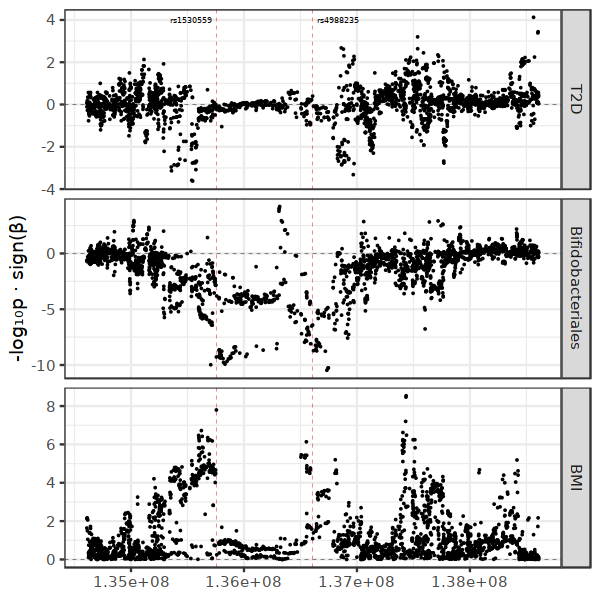

In [33]:
options(repr.plot.height = 5, repr.plot.width = 5)
lct_plot <- lct_join %>%
    transmute(pos,
              BMI_val = -log10(pval_bmi),
              Bifidobacteriales_val = -log10(pval_micro) * sign(beta_micro),
              T2D_val = -log10(pval_t2d) * sign(beta_t2d)) %>%
    pivot_longer(-pos) %>%
    mutate(name = gsub("_val", "", name),
           name = factor(name, levels = c("T2D", "Bifidobacteriales", "BMI"))) %>%
    ggplot(aes(pos, value)) +
    geom_hline(yintercept = 0, linetype = "dashed", size = .1) +
    geom_vline(xintercept = 136608646, linetype = "dashed", color = "red", size = .1) +
    geom_text(data = data.frame(pos = 136608646, value = 4, 
                                name = factor("T2D", levels = c("T2D", "Bifidobacteriales", "BMI"))),
              label = "rs4988235", hjust = -.1, size = 1.5) +
    geom_vline(xintercept = 135755629, linetype = "dashed", color = "red", size = .1) +
    geom_text(data = data.frame(pos = 135755629, value = 4, 
                                name = factor("T2D", levels = c("T2D", "Bifidobacteriales", "BMI"))),
              label = "rs1530559", hjust = 1.1, size = 1.5) +
    geom_point(size = .01) +
    facet_wrap(~name, ncol = 1, scales = "free_y", strip.position = "right") +
    theme_bw() +
    labs(x = NULL, y = "-log\u2081\u2080p \u00b7 sign(\u03b2)")
lct_plot

In [9]:
gencode <- rtracklayer::readGFF("~/projects/DVA/Data/ReferenceData/gencode.v19.annotation.gtf")
head(gencode)

,seqid,source,type,start,end,score,strand,phase,gene_id,transcript_id,⋯,transcript_name,level,havana_gene,tag,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid
,<fct>,<fct>,<fct>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,chr1,HAVANA,gene,11869,14412,NA,+,NA,ENSG00000223972.4,ENSG00000223972.4,⋯,DDX11L1,2,OTTHUMG00000000961.2,NA,NA,NA,NA,NA,NA,NA
2,chr1,HAVANA,transcript,11869,14409,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,NA,NA,NA,NA,NA
3,chr1,HAVANA,exon,11869,12227,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,1,ENSE00002234944.1,NA,NA,NA
4,chr1,HAVANA,exon,12613,12721,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,2,ENSE00003582793.1,NA,NA,NA
5,chr1,HAVANA,exon,13221,14409,NA,+,NA,ENSG00000223972.4,ENST00000456328.2,⋯,DDX11L1-002,2,OTTHUMG00000000961.2,basic,OTTHUMT00000362751.1,3,ENSE00002312635.1,NA,NA,NA
6,chr1,ENSEMBL,transcript,11872,14412,NA,+,NA,ENSG00000223972.4,ENST00000515242.2,⋯,DDX11L1-201,3,OTTHUMG00000000961.2,NA,NA,NA,NA,NA,NA,NA


In [10]:
gene_regions <- gencode %>%
    filter(type == "gene", gene_type == "protein_coding") %>%
    transmute(chrom = as.numeric(gsub("chr", "", seqid)), gene_name, start, end, strand, gene_type) %>%
    drop_na %>%
    filter(chrom == 2, start > 134608646, end < 138608646)
gene_regions

Warning message in mask$eval_all_mutate(quo):
"NAs introduced by coercion"


chrom,gene_name,start,end,strand,gene_type
<dbl>,<chr>,<int>,<int>,<chr>,<chr>
2,MGAT5,134877554,135212192,+,protein_coding
2,TMEM163,135213330,135476570,-,protein_coding
2,ACMSD,135596117,135659604,+,protein_coding
2,CCNT2,135675805,135716912,+,protein_coding
2,MAP3K19,135722061,135805038,-,protein_coding
2,RAB3GAP1,135809835,135933964,+,protein_coding
2,ZRANB3,135894486,136288806,-,protein_coding
2,R3HDM1,136289025,136482840,+,protein_coding
2,UBXN4,136499189,136542625,+,protein_coding


In [11]:
gene_track_dat <- gene_regions %>%
    mutate(xstart = ifelse(strand == "+", start, end),
           xend = ifelse(strand == "+", end, start))

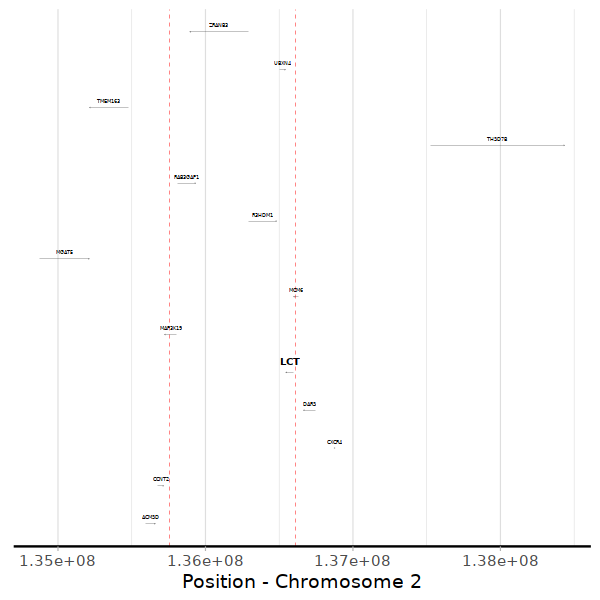

In [32]:
options(repr.plot.height = 5, repr.plot.width = 5)
gene_track_plot <- gene_track_dat %>%
    ggplot(aes(y = gene_name, x = xstart, xend = xend,
               yend = gene_name, label = gene_name)) +
    geom_vline(xintercept = 135755629, linetype = "dashed", color = "red", size = .1) +
    geom_vline(xintercept = 136608646, linetype = "dashed", color = "red", size = .1) +
    geom_segment(arrow = arrow(length = unit(.01, "in")), alpha = .5, size = .1) +
    geom_text(aes(x = (xend + xstart) / 2, y = gene_name, 
                  size = ifelse(gene_name == "LCT", 2, 1),
                  fontface = ifelse(gene_name == "LCT", "bold", "plain")),
              vjust = -1.1) +
    scale_size_identity() +
    labs(x = paste("Position - Chromosome 2"), y = NULL) +
    coord_cartesian(clip = "off") +
    theme_light() +
    theme(axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.border = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank(),
          axis.line.x.bottom = element_line(colour = "black"))
gene_track_plot

In [13]:
lims_locus <- ggplot_build(lct_plot)$layout$panel_scales_x[[1]]$range$range
lims_locus

[1] 134609163 138608346

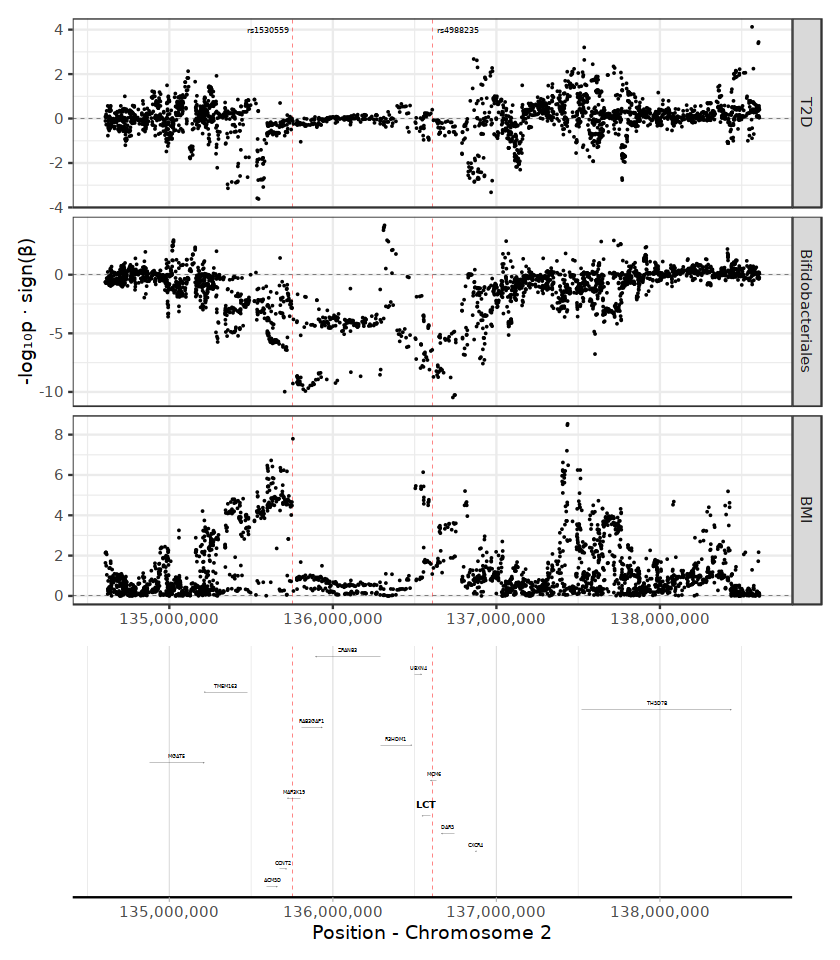

In [34]:
options(repr.plot.height = 8, repr.plot.width = 7)
plot3 <- patchwork::wrap_plots(lct_plot,
                      gene_track_plot, 
                      ncol = 1, heights = c(.7, .3)) &
    scale_x_continuous(labels = scales::comma, limits = lims_locus)
save(plot3, file = "../data/plot3.RData")
plot3